Scenario 5: Website Traffic Analysis

You track website visits.

Tasks:

Generate hourly traffic data for 7 days.


Identify:


Peak traffic hour


Lowest traffic hour


Calculate daily averages.


Plot:


Line plot of traffic


Separate plot for average daily traffic


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)


Task - 1 

Here Generating Hourly Traffic Data for 7 days

In [28]:
hours = 7*24

date_time = pd.date_range(start = '2026-02-01', periods = hours , freq = 'H')
traffic = np.random.randint(50,500,hours)

df_traffic = pd.DataFrame({
    'datetime' : date_time,
    'visits' : traffic
})

df_traffic.head(24)

C:\Users\dhira\AppData\Local\Temp\ipykernel_25176\1493053888.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_time = pd.date_range(start = '2026-02-01', periods = hours , freq = 'H')


,datetime,visits
0,2026-02-01 00:00:00,152
1,2026-02-01 01:00:00,485
2,2026-02-01 02:00:00,398
3,2026-02-01 03:00:00,320
4,2026-02-01 04:00:00,156
5,2026-02-01 05:00:00,121
6,2026-02-01 06:00:00,238
7,2026-02-01 07:00:00,70
8,2026-02-01 08:00:00,152
9,2026-02-01 09:00:00,171


Task - 2

1.Peak traffic hour


In [29]:
peak_traffic_hour = df_traffic.loc[df_traffic['visits'].idxmax()]
peak_traffic_hour

datetime    2026-02-07 06:00:00
visits                      498
Name: 150, dtype: object

2.Lowest traffic hour

In [30]:
lowest_traffic_hour = df_traffic.loc[df_traffic['visits'].idxmin()]
lowest_traffic_hour

datetime    2026-02-04 06:00:00
visits                       51
Name: 78, dtype: object

3.Calculate daily averages.

In [75]:
df_traffic['datetime'] = pd.to_datetime(df_traffic['datetime'])

df_traffic['date'] = df_traffic['datetime'].dt.date

daily_avg_traffic = (
    df_traffic
    .groupby('date', as_index=False)
    .mean(numeric_only=True)
)

daily_avg_traffic



,date,visits,daily_avg_traffic
0,2026-02-01,269.500000,NaN
1,2026-02-02,284.750000,NaN
2,2026-02-03,293.333333,NaN
3,2026-02-04,286.625000,NaN
4,2026-02-05,277.541667,NaN
5,2026-02-06,251.791667,NaN
6,2026-02-07,285.250000,NaN


In [74]:
high_traffic = daily_avg_traffic[daily_avg_traffic > 270]
high_traffic

dates
2026-02-02    284.750000
2026-02-03    293.333333
2026-02-04    286.625000
2026-02-05    277.541667
2026-02-07    285.250000
Name: visits, dtype: float64

Task - 3

1.Line Plot of Traffic

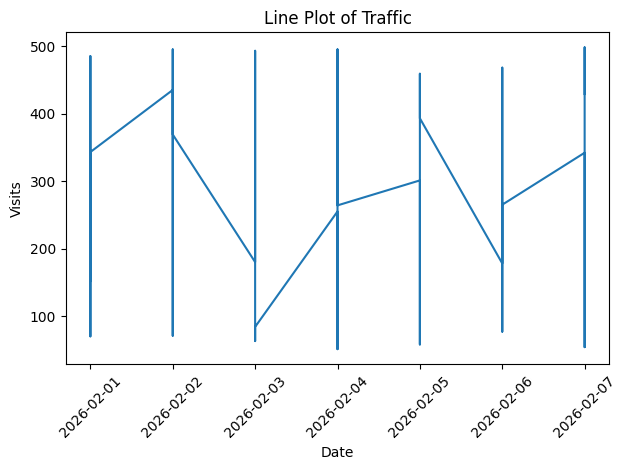

In [77]:
plt.plot(df_traffic['datetime'],
         df_traffic['visits'],
         )
plt.xlabel('Date')
plt.ylabel('Visits')
plt.title('Line Plot of Traffic')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2.Plot for Average Daily Traffic

In [84]:
daily_avg_traffic.rename(
    columns={'visits': 'avg_daily_visits'},
    inplace=True
)


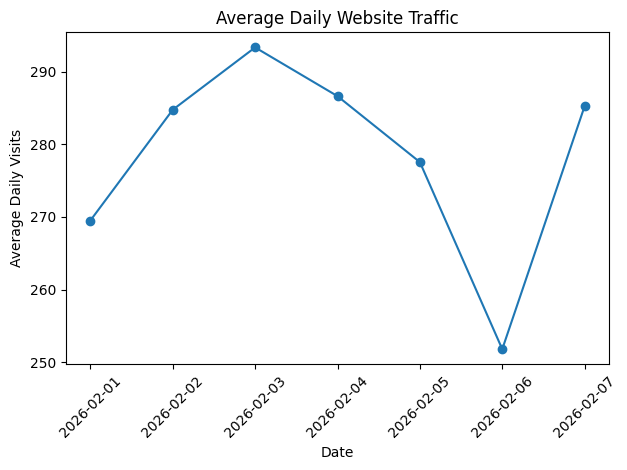

In [85]:
plt.plot(
    daily_avg_traffic['date'],
    daily_avg_traffic['avg_daily_visits'],
    marker='o'
)

plt.xlabel('Date')
plt.ylabel('Average Daily Visits')
plt.title('Average Daily Website Traffic')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
